### Football Club Grouping Machine Learning Model

This project builds a machine learning model to predict where in the table football cllubs will finish their season

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import warnings
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
#Ignore warnings for cleaner look
warnings.filterwarnings("ignore")

In [3]:
#Import Football Dataframe
df=pd.read_csv(r"/Users/shitikshuvyas/Desktop/Masters/Football_Data.csv")
df.shape

(1020, 9)

In [4]:
#Viewing Data
df.head()

,club,season,prev_position_1,prev_position_2,prev_position_3,transfer_spend_million,squad_value_million,age_mean,tier_label
0,Leeds United,2020,14,17.0,15.0,58.123412,53.394593,27.014088,Mid
1,Inter Milan,2024,16,3.0,1.0,103.617981,384.993384,26.374843,Relegation
2,Rangers,2002,14,1.0,1.0,87.749586,368.267672,24.846580,Mid
3,Leverkusen,2000,6,1.0,8.0,163.075704,637.264498,24.621116,Europe
4,Brentford,2008,14,16.0,7.0,4.555776,188.198485,27.088127,Mid


In [6]:
#Data Preparation and Data Cleaning
df.rename(columns={'club':'Club','season':'Season','tier_label':'Season_Rank'},inplace=True)
df.drop_duplicates(inplace=True)

#Replacing blank values with respective medians 
df['prev_position_2'].fillna(df['prev_position_2'].median(),inplace=True)
df['prev_position_3'].fillna(df['prev_position_3'].median(),inplace=True)
df['squad_value_million'].fillna(df['squad_value_million'].median(),inplace=True)
df['age_mean'].fillna(df['age_mean'].median(),inplace=True)

df.shape

(1020, 9)

In [7]:
#Checking for blank entries
print("Number of rows with blanks in column Club = ",df['Club'].isna().sum())
print("Number of rows with blanks in column Season = ",df['Season'].isna().sum())
print("Number of rows with blanks in column prev_position_1 = ",df['prev_position_1'].isna().sum())
print("Number of rows with blanks in column prev_position_2 = ",df['prev_position_2'].isna().sum())
print("Number of rows with blanks in column prev_position_3 = ",df['prev_position_3'].isna().sum())
print("Number of rows with blanks in column transfer_spend_million = ",df['transfer_spend_million'].isna().sum())
print("Number of rows with blanks in column squad_value_million = ",df['squad_value_million'].isna().sum())
print("Number of rows with blanks in column age_mean = ",df['age_mean'].isna().sum())
print("Number of rows with blanks in column Season_Rank = ",df['Season_Rank'].isna().sum())

Number of rows with blanks in column Club =  0
Number of rows with blanks in column Season =  0
Number of rows with blanks in column prev_position_1 =  0
Number of rows with blanks in column prev_position_2 =  0
Number of rows with blanks in column prev_position_3 =  0
Number of rows with blanks in column transfer_spend_million =  0
Number of rows with blanks in column squad_value_million =  0
Number of rows with blanks in column age_mean =  0
Number of rows with blanks in column Season_Rank =  0


Duplicate rows are dropped, and blank values are filled with the respective median values

Some important statistical inferences:  
a) The mean of prev_position_1 is 14.5, which indicates that the overall ranking of our clubs in the last season was generally poor, as the least position a club could have is 20.  
b) There is a wide disparity between the transfer fees spend by clubs, with a range of about 198 million USD. Similary, the range of squad values is roughly 635 million USD.  
c) There are comparatively much fewer clubs in the Top4 as compared to other rankings.


In [8]:
#Statistical Summary of Numerical Values
df.describe()

,Season,prev_position_1,prev_position_2,prev_position_3,transfer_spend_million,squad_value_million,age_mean
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,2012.012745,14.532353,9.622549,9.680392,61.244419,261.863535,26.554612
std,7.197265,4.288187,5.352692,4.914760,51.299125,243.676286,1.477386
min,2000.000000,1.000000,1.000000,1.000000,1.337396,20.033575,21.282746
25%,2006.000000,12.000000,6.000000,6.000000,23.713804,89.090999,25.615399
50%,2012.000000,15.000000,9.000000,9.000000,46.605568,153.862040,26.538974
75%,2018.000000,18.000000,14.000000,14.000000,82.980536,407.794010,27.535382
max,2024.000000,20.000000,19.000000,19.000000,199.896560,898.078874,31.289661


In [9]:
#Target Variable Value Counts
df['Season_Rank'].value_counts()

Season_Rank
Relegation    475
Mid           422
Europe        100
Top4           23
Name: count, dtype: int64

Visually plotting the graphs helps identify a few trends:  
a) Transfer fees spent by clubs and squad values of clubs are right-skewed.  
b) Average squad age is normally distributed.  
c) There is a general trend, that as squad value increases, so does season ranking. However, there are prominent outliers.  

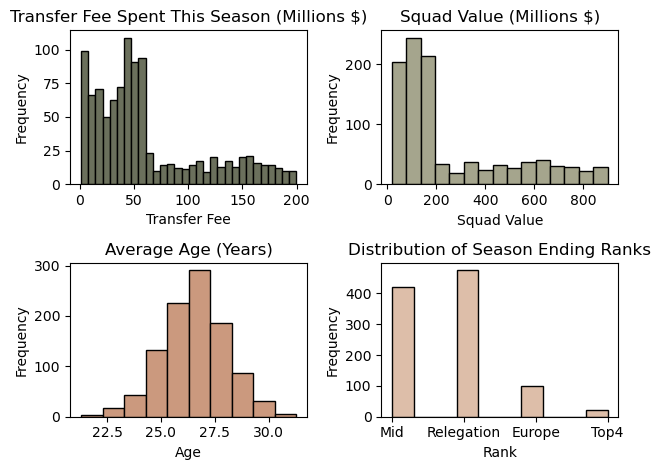

In [10]:
#Plotting Data For Visual Representation
fig,axs = plt.subplots(2,2)

m=df['transfer_spend_million']
n=df['squad_value_million']
o=df['age_mean']
p=df['Season_Rank']

axs[0,0].hist(m,bins=30,color='#6B705C',edgecolor='black')
axs[0,0].set_title("Transfer Fee Spent This Season (Millions $)")
axs[0,0].set_xlabel("Transfer Fee")
axs[0,0].set_ylabel("Frequency")

axs[0,1].hist(n,bins=15,color='#A5A58D',edgecolor='black')
axs[0,1].set_title("Squad Value (Millions $)")
axs[0,1].set_xlabel("Squad Value")
axs[0,1].set_ylabel("Frequency")

axs[1,0].hist(o,bins=10,color='#CB997E',edgecolor='black')
axs[1,0].set_title("Average Age (Years)")
axs[1,0].set_xlabel("Age")
axs[1,0].set_ylabel("Frequency")

axs[1,1].hist(p,color='#DDBEA9',edgecolor='black')
axs[1,1].set_title("Distribution of Season Ending Ranks")
axs[1,1].set_xlabel("Rank")
axs[1,1].set_ylabel("Frequency")

plt.tight_layout()

Text(0, 0.5, "Previous Season's Table Finish")

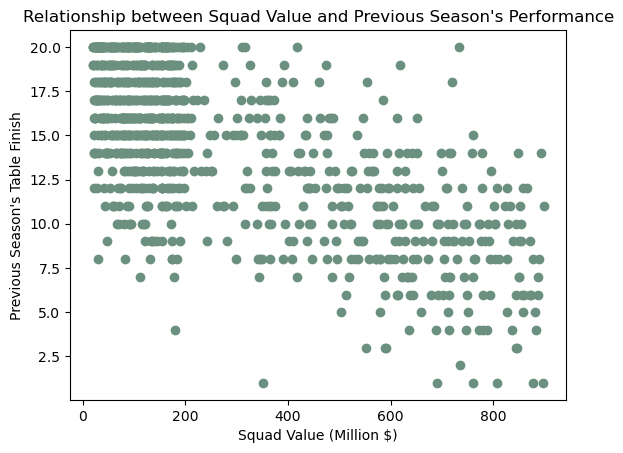

In [11]:
#Understanding relationship between squad value and squad's table position
plt.scatter(df['squad_value_million'],df['prev_position_1'],color="#6B9080")
plt.title("Relationship between Squad Value and Previous Season's Performance")
plt.xlabel("Squad Value (Million $)")
plt.ylabel("Previous Season's Table Finish")

Text(0, 0.5, 'Money Spent On Transfers (Million $)')

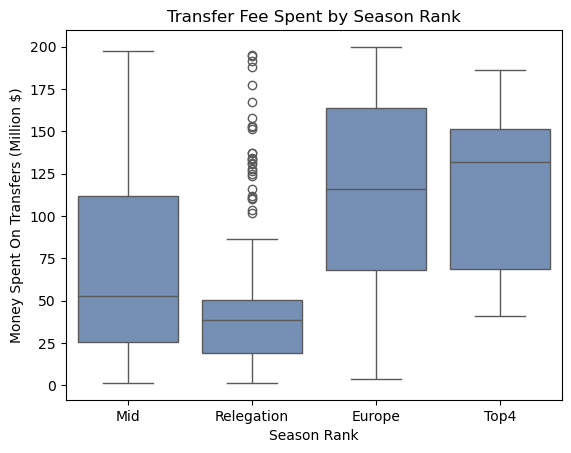

In [12]:
#Understanding relationship between transfer spends and squad's table position
sns.boxplot(x=df['Season_Rank'],y=df['transfer_spend_million'],color='#6C8EBF')
plt.title("Transfer Fee Spent by Season Rank")
plt.xlabel("Season Rank")
plt.ylabel("Money Spent On Transfers (Million $)")

Two important features, transfer fees spent and squad value are log-transformed, so that the wide range of thier values doesn't negatively affect the model.

In [13]:
#Transforming data using log to avoid skewness
df['log_transfer_fee']=np.log1p(df['transfer_spend_million'])
df['log_squad_value']=np.log1p(df['squad_value_million'])

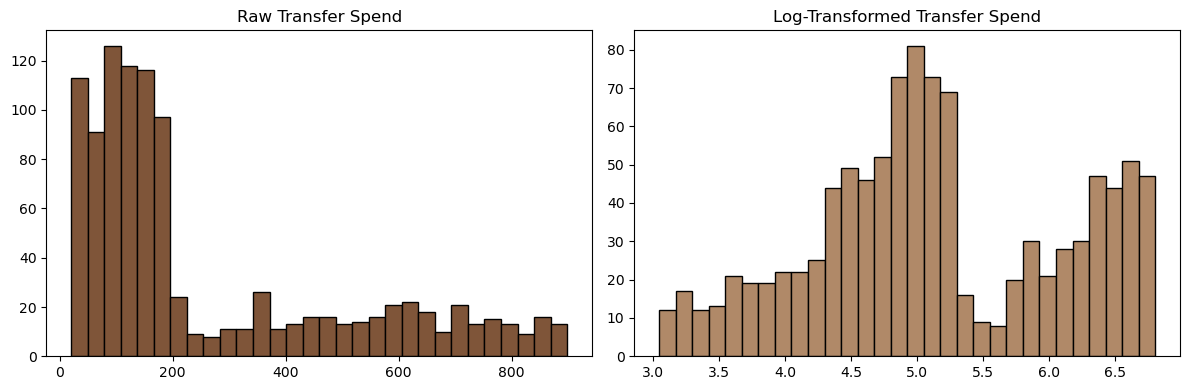

In [14]:
#Comparing raw data with log-transformed data
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].hist(df['squad_value_million'], bins=30, color="#7F5539",edgecolor='black')
axs[0].set_title("Raw Transfer Spend")

axs[1].hist(df['log_squad_value'], bins=30, color='#B08968',edgecolor='black')
axs[1].set_title("Log-Transformed Transfer Spend")

plt.tight_layout()
plt.show()

In [15]:
#Converting Target Variable into Numerical Form for Machine Learning Model
df['Season_Rank_Numerical'] = LabelEncoder().fit_transform(df['Season_Rank'])

#One-Hot encoding categorical input column
df_model = pd.get_dummies(df, columns=['Club'], drop_first=True)

We begin with a Logistic Regression model, followed by a Random Forest model. Models are evaluated using precision, recall, and f1-scores.

In [16]:
#Train Test Split
X = df_model.drop(['Season_Rank', 'Season_Rank_Numerical','transfer_spend_million','squad_value_million'], axis=1)
Y = df_model['Season_Rank_Numerical']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
#Predicting Y values for X_test using Logistic Regression
model_lr = LogisticRegression(max_iter=500)
model_lr.fit(X_train, Y_train)

Y_pred_lr = model_lr.predict(X_test)

#Evaluating Model Performance
print(classification_report(Y_test, Y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       0.97      0.97      0.97        72
           2       0.99      1.00      1.00       106
           3       1.00      1.00      1.00         2

    accuracy                           0.98       204
   macro avg       0.98      0.97      0.98       204
weighted avg       0.98      0.98      0.98       204



In [18]:
#Predicting Y values for X_test using Random Forests
model_rf = RandomForestClassifier(n_estimators=200,random_state=42)
model_rf.fit(X_train, Y_train)

Y_pred_rf = model_rf.predict(X_test)

#Evaluating Model Performance
print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.95      1.00      0.97        72
           2       1.00      0.98      0.99       106
           3       0.00      0.00      0.00         2

    accuracy                           0.97       204
   macro avg       0.72      0.72      0.72       204
weighted avg       0.96      0.97      0.97       204



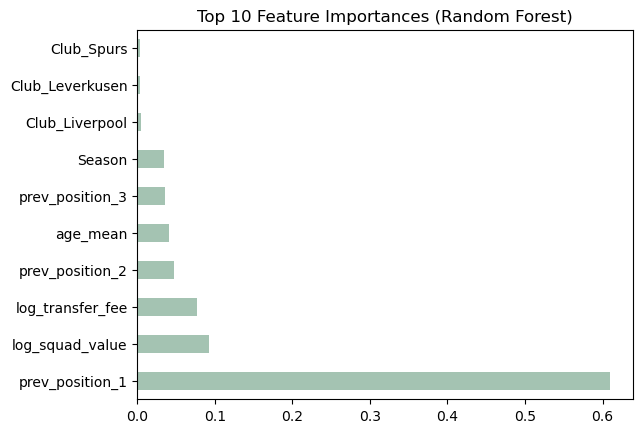

In [19]:
#Plotting feature importance for top 10 features
feature_importance = model_rf.feature_importances_
feature_names = X_train.columns

feat_imp = pd.Series(feature_importance, index=feature_names)
feat_imp.sort_values(ascending=False).head(10).plot(kind='barh',color='#A4C3B2')

plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

The model indicates that the previous season's ranking, squad value, and transfer fees spent are strong predictors of a football club's season end finish.